In [2]:
import pandas as pd
import csv
import networkx as nx
import matplotlib.pyplot as plt

## Terminology

* **Bridge**: An individual whose weak ties fill a structural hole, providing the only link between two individuals or clusters. It also includes the shortest route when a longer one is unfeasible due to a high risk of message distortion or delivery failure.
* **Centrality**: Centrality refers to a group of metrics that aim to quantify the "importance" or "influence" (in a variety of senses) of a particular node (or group) within a network.
    * **Betweenness centrality** is a measure of centrality in a graph based on shortest paths. For every pair of vertices in a connected graph, there exists at least one shortest path between the vertices such that either the number of edges that the path passes through (for unweighted graphs) or the sum of the weights of the edges (for weighted graphs) is minimized. The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex.
    * **Closeness centrality** of a node is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. 
    * **Degree centrality** is defined as the number of links incident upon a node (i.e., the number of ties that a node has)
* **Density**: The proportion of direct ties in a network relative to the total number possible.
* **Distance:** The minimum number of ties required to connect two particular actors, as popularized by Stanley Milgram's small world experiment and the idea of 'six degrees of separation'.

**References:**
1. https://en.wikipedia.org/wiki/Social_network_analysis
2. https://en.wikipedia.org/wiki/Betweenness_centrality
3. https://en.wikipedia.org/wiki/Closeness_centrality
4. https://en.wikipedia.org/wiki/Centrality#Degree_centrality

## What Questions Can We Ask / Answer
* How interconnected everyone is?  -> Network density
* Are there any points of failure? —> Identify bridges
* Find out the person / persons with most connections - maybe a person in charge —> Identify bridges, find nodes with highest degrees
* Strongest connections —> highest betweenness centrality (Rating >= 4 and conf == 3)
* Maybe filter by the strongest or the most verified connections (conf == 3)
* What are the discrepancies between the two ratings —> query data frame
* How are they organized?  Are there any groups?
* Looking for cliques and bridges



In [3]:
df = pd.read_csv('9_11.csv')
df.columns = ['name1','name2','rating','conf']
df.head()

,name1,name2,rating,conf
0,Hani Hanjour,Nawaf Alhazmi,3,2
1,Hani Hanjour,Khalid Al-Mihdhar,5,2
2,Hani Hanjour,Lotfi Raissi,3,2
3,Hani Hanjour,Bandar Alhazmi,1,1
4,Hani Hanjour,Rayed Mohammed Abdullah,3,2


In [4]:
G = nx.from_pandas_edgelist(df, source='name1', target='name2', edge_attr=True,)

In [5]:
G.nodes()

NodeView(('Hani Hanjour', 'Nawaf Alhazmi', 'Khalid Al-Mihdhar', 'Lotfi Raissi', 'Bandar Alhazmi', 'Rayed Mohammed Abdullah', 'Majed Moqed', 'Salem Alhazmi', 'Hamza Alghamdi', 'Ahmed Alnami', 'Saeed Alghamdi', 'Abdussattar Shaikh', 'Osama Awadallah', 'Mohamed Atta', 'Abdul Aziz Al-Omari', 'Marwan Al-Shehhi', 'Ziad Jarrah', 'Said Bahaji', 'Ramzi Bin al-Shibh', 'Zakariya Essabar', 'Essid Sami Ben Khemais', 'Waleed Alshehri', 'Wail Alshehri', 'Satam Suqami', 'Fayez Ahmed', 'Mohand Alshehri', 'Mustafa Ahmed al-Hisawi', 'Ahmed Alghamdi', 'Ahmed Al Haznawi', 'Zacarias Moussaoui', 'Djamal Beghal', 'Jerome Courtaillier', 'David Courtaillier', 'Ahmed Ressam', 'Kamel Daoudi', 'Tarek Maaroufi', 'Faisal Al Salmi', 'Mohamed Abdi', 'Mamoun Darkazanli', 'Ahmed Khalil Ibrahim Samir Al-Ani', 'Agus Budiman', 'Mounir El Motassadeq ', 'Abdelghani Mzoudi', 'Imad Eddin Barakat Yarkas', 'Nabil al-Marabh', 'Raed Hijazi', 'Abu Qatada', 'Mamduh Mahmud Salim', 'Mohammed Belfas', 'Abu Walid', 'Mohammed Jaweed Azma

In [6]:
G.edges()

EdgeView([('Hani Hanjour', 'Nawaf Alhazmi'), ('Hani Hanjour', 'Khalid Al-Mihdhar'), ('Hani Hanjour', 'Lotfi Raissi'), ('Hani Hanjour', 'Bandar Alhazmi'), ('Hani Hanjour', 'Rayed Mohammed Abdullah'), ('Hani Hanjour', 'Majed Moqed'), ('Hani Hanjour', 'Salem Alhazmi'), ('Hani Hanjour', 'Mohamed Atta'), ('Hani Hanjour', 'Abdul Aziz Al-Omari'), ('Hani Hanjour', 'Ahmed Alghamdi'), ('Hani Hanjour', 'Faisal Al Salmi'), ('Hani Hanjour', 'Marwan Al-Shehhi'), ('Hani Hanjour', 'Ziad Jarrah'), ('Nawaf Alhazmi', 'Salem Alhazmi'), ('Nawaf Alhazmi', 'Khalid Al-Mihdhar'), ('Nawaf Alhazmi', 'Hamza Alghamdi'), ('Nawaf Alhazmi', 'Ahmed Alnami'), ('Nawaf Alhazmi', 'Saeed Alghamdi'), ('Nawaf Alhazmi', 'Abdussattar Shaikh'), ('Nawaf Alhazmi', 'Osama Awadallah'), ('Nawaf Alhazmi', 'Majed Moqed'), ('Nawaf Alhazmi', 'Mohamed Abdi'), ('Nawaf Alhazmi', 'Mohamed Atta'), ('Khalid Al-Mihdhar', 'Abdussattar Shaikh'), ('Khalid Al-Mihdhar', 'Osama Awadallah'), ('Khalid Al-Mihdhar', 'Majed Moqed'), ('Khalid Al-Mihdhar',

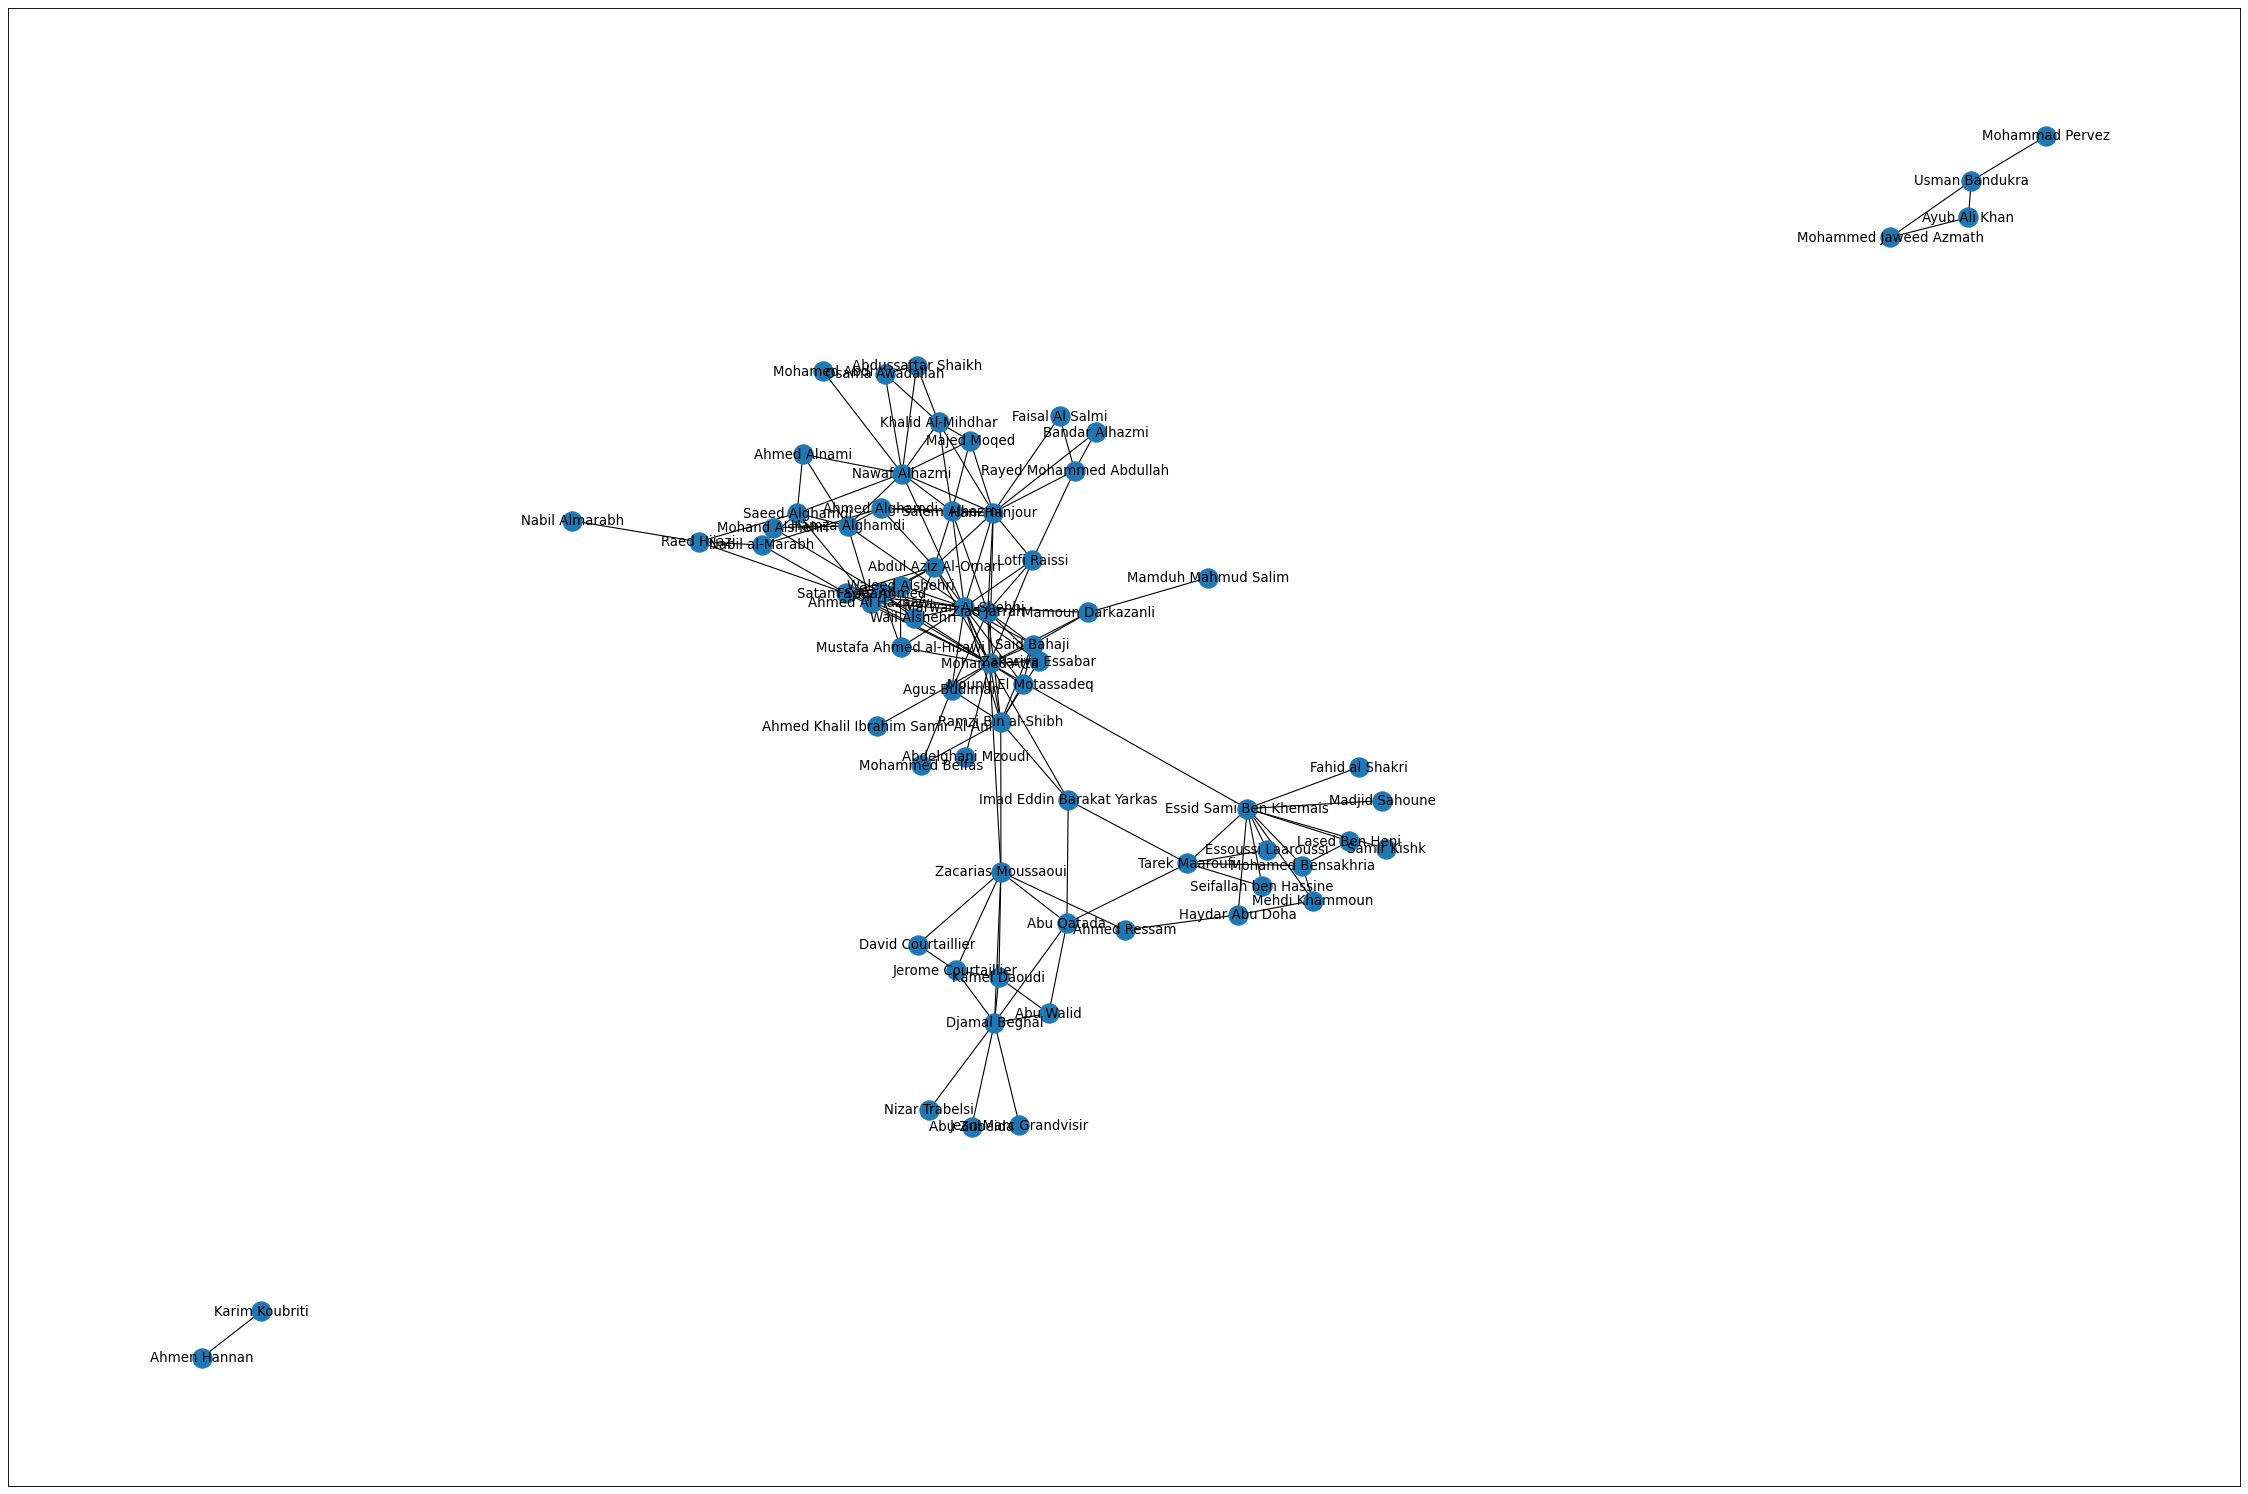

In [7]:
plt.figure(figsize=(36, 24), dpi=80)
nx.draw_networkx(G)

In [8]:
df.query("rating == 5")

,name1,name2,rating,conf
1,Hani Hanjour,Khalid Al-Mihdhar,5,2
6,Nawaf Alhazmi,Hani Hanjour,5,1
11,Nawaf Alhazmi,Saeed Alghamdi,5,1
15,Khalid Al-Mihdhar,Hani Hanjour,5,2
21,Mohamed Atta,Ziad Jarrah,5,2
...,...,...,...,...
347,Samir Kishk,Essid Sami Ben Khemais,5,1
354,Imad Eddin Barakat Yarkas,Tarek Maaroufi,5,2
372,Ziad Jarrah,Salem Alhazmi,5,1
376,Djamal Beghal,Abu Zubeida,5,2


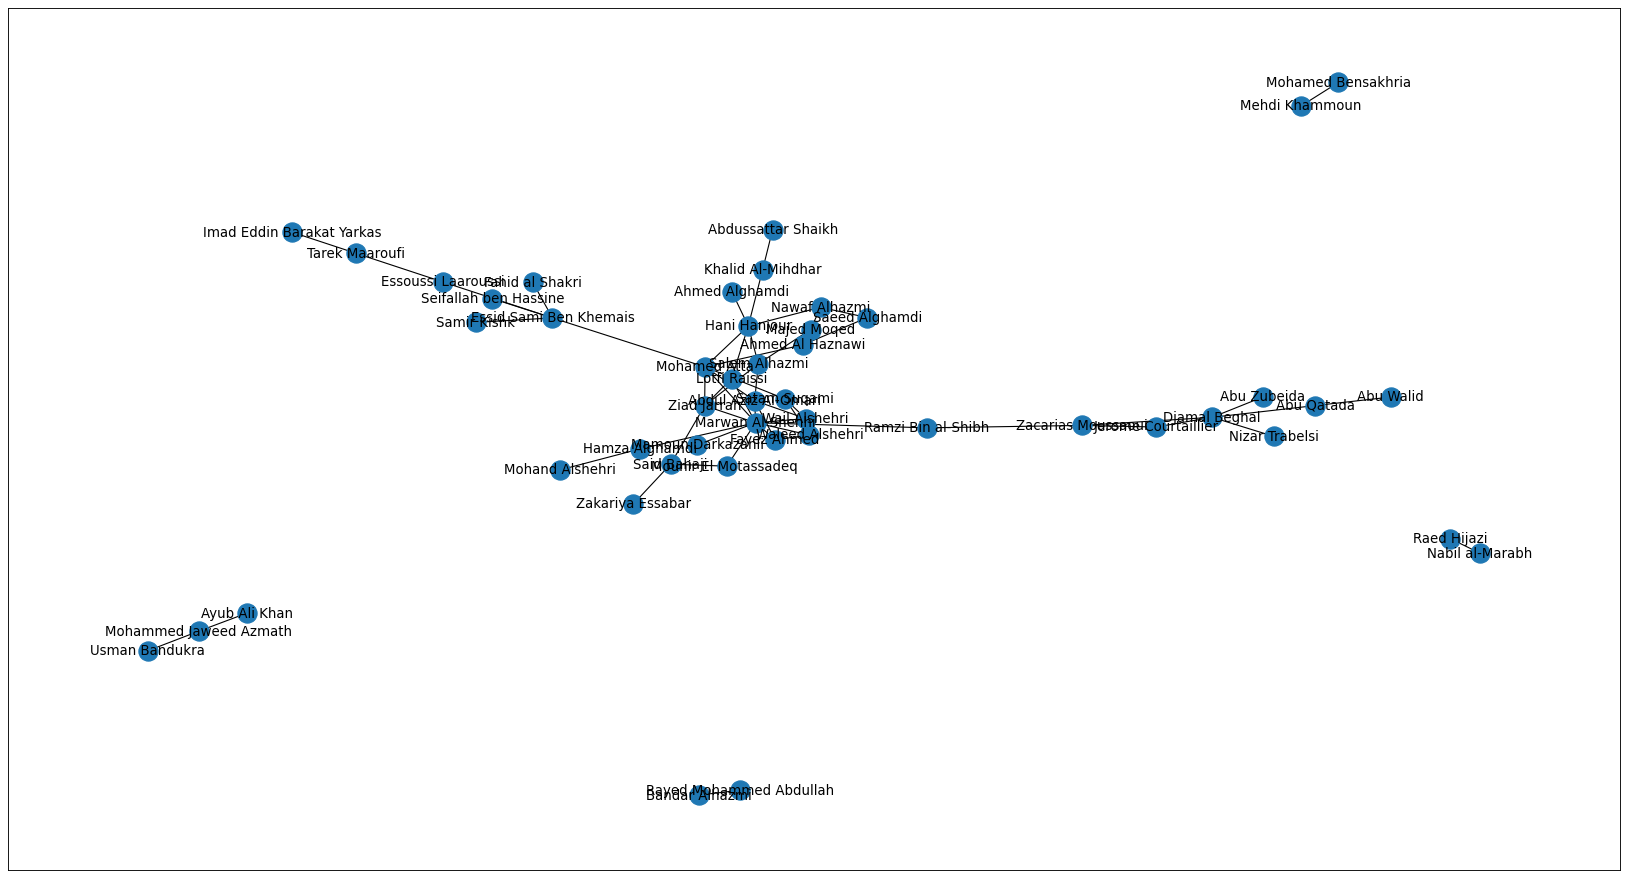

In [9]:
G1 = nx.from_pandas_edgelist(df.query("rating == 5"), source='name1', target='name2', edge_attr=True,)
plt.figure(figsize=(26, 14), dpi=80)
nx.draw_networkx(G1)

In [10]:
cc = nx.algorithms.closeness_centrality(G) 
{k: v for k, v in sorted(cc.items(), key=lambda item: item[1])}

{'Karim Koubriti': 0.014705882352941176,
 'Ahmen Hannan': 0.014705882352941176,
 'Mohammad Pervez': 0.026470588235294117,
 'Mohammed Jaweed Azmath': 0.03308823529411765,
 'Ayub Ali Khan': 0.03308823529411765,
 'Usman Bandukra': 0.04411764705882353,
 'Nabil Almarabh': 0.21995880064087892,
 'Nizar Trabelsi': 0.22611764705882353,
 'Jean-Marc Grandvisir': 0.22611764705882353,
 'Abu Zubeida': 0.22611764705882353,
 'Abu Walid': 0.23852072474559446,
 'Mamduh Mahmud Salim': 0.25463698993110756,
 'Samir Kishk': 0.27441462021701885,
 'Fahid al Shakri': 0.27441462021701885,
 'Madjid Sahoune': 0.27441462021701885,
 'Lased Ben Heni': 0.2757532281205165,
 'David Courtaillier': 0.27710495963091114,
 'Mohammed Belfas': 0.27710495963091114,
 'Mehdi Khammoun': 0.27847000869313243,
 'Mohamed Abdi': 0.27984857309260336,
 'Bandar Alhazmi': 0.2812408545507755,
 'Faisal Al Salmi': 0.2812408545507755,
 'Abdussattar Shaikh': 0.2826470588235294,
 'Osama Awadallah': 0.2826470588235294,
 'Mohand Alshehri': 0.2826

In [11]:
cc = nx.algorithms.betweenness_centrality(G) 
{k: v for k, v in sorted(cc.items(), key=lambda item: item[1])}

{'Bandar Alhazmi': 0.0,
 'Majed Moqed': 0.0,
 'Ahmed Alnami': 0.0,
 'Abdussattar Shaikh': 0.0,
 'Osama Awadallah': 0.0,
 'Zakariya Essabar': 0.0,
 'David Courtaillier': 0.0,
 'Faisal Al Salmi': 0.0,
 'Mohamed Abdi': 0.0,
 'Ahmed Khalil Ibrahim Samir Al-Ani': 0.0,
 'Mounir El Motassadeq ': 0.0,
 'Abdelghani Mzoudi': 0.0,
 'Mamduh Mahmud Salim': 0.0,
 'Mohammed Belfas': 0.0,
 'Mohammed Jaweed Azmath': 0.0,
 'Ayub Ali Khan': 0.0,
 'Nabil Almarabh': 0.0,
 'Lased Ben Heni': 0.0,
 'Essoussi Laaroussi': 0.0,
 'Samir Kishk': 0.0,
 'Fahid al Shakri': 0.0,
 'Seifallah ben Hassine': 0.0,
 'Karim Koubriti': 0.0,
 'Ahmen Hannan': 0.0,
 'Nizar Trabelsi': 0.0,
 'Jean-Marc Grandvisir': 0.0,
 'Abu Zubeida': 0.0,
 'Mohammad Pervez': 0.0,
 'Madjid Sahoune': 0.0,
 'Mohand Alshehri': 0.0004389815627743635,
 'Mehdi Khammoun': 0.0004389815627743635,
 'Rayed Mohammed Abdullah': 0.0006584723441615452,
 'Abu Walid': 0.0007096868598185543,
 'Waleed Alshehri': 0.0007133450395083406,
 'Usman Bandukra': 0.000877963

In [12]:
cc = nx.algorithms.degree_centrality(G) 
{k: v for k, v in sorted(cc.items(), key=lambda item: item[1])}

{'Mohamed Abdi': 0.014705882352941176,
 'Ahmed Khalil Ibrahim Samir Al-Ani': 0.014705882352941176,
 'Abdelghani Mzoudi': 0.014705882352941176,
 'Mamduh Mahmud Salim': 0.014705882352941176,
 'Nabil Almarabh': 0.014705882352941176,
 'Samir Kishk': 0.014705882352941176,
 'Fahid al Shakri': 0.014705882352941176,
 'Karim Koubriti': 0.014705882352941176,
 'Ahmen Hannan': 0.014705882352941176,
 'Nizar Trabelsi': 0.014705882352941176,
 'Jean-Marc Grandvisir': 0.014705882352941176,
 'Abu Zubeida': 0.014705882352941176,
 'Mohammad Pervez': 0.014705882352941176,
 'Madjid Sahoune': 0.014705882352941176,
 'Bandar Alhazmi': 0.029411764705882353,
 'Mohand Alshehri': 0.029411764705882353,
 'David Courtaillier': 0.029411764705882353,
 'Ahmed Ressam': 0.029411764705882353,
 'Faisal Al Salmi': 0.029411764705882353,
 'Mohammed Belfas': 0.029411764705882353,
 'Mohammed Jaweed Azmath': 0.029411764705882353,
 'Ayub Ali Khan': 0.029411764705882353,
 'Lased Ben Heni': 0.029411764705882353,
 'Essoussi Laaroussi